In [53]:
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import base64

def aes_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(plaintext.encode('utf-8'))
    return base64.b64encode(nonce + ciphertext).decode('utf-8')

def aes_decrypt(ciphertext, key):
    raw = base64.b64decode(ciphertext)
    nonce = raw[:16]
    ciphertext = raw[16:]
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext.decode('utf-8')


# Test AES functions
key = get_random_bytes(16)
plaintext = "This is a test message."
ciphertext = aes_encrypt(plaintext, key)
print("AES Ciphertext:", ciphertext)
decrypted_text = aes_decrypt(ciphertext, key)
print("AES Decrypted text:", decrypted_text)


AES Ciphertext: y3VPkBqcRJhetrDjCqRh1ON23mZnEEKw5atf1nH5OAXK38J3yviy
AES Decrypted text: This is a test message.


# Step 1: Implement AES Encryption on Classical Simulator

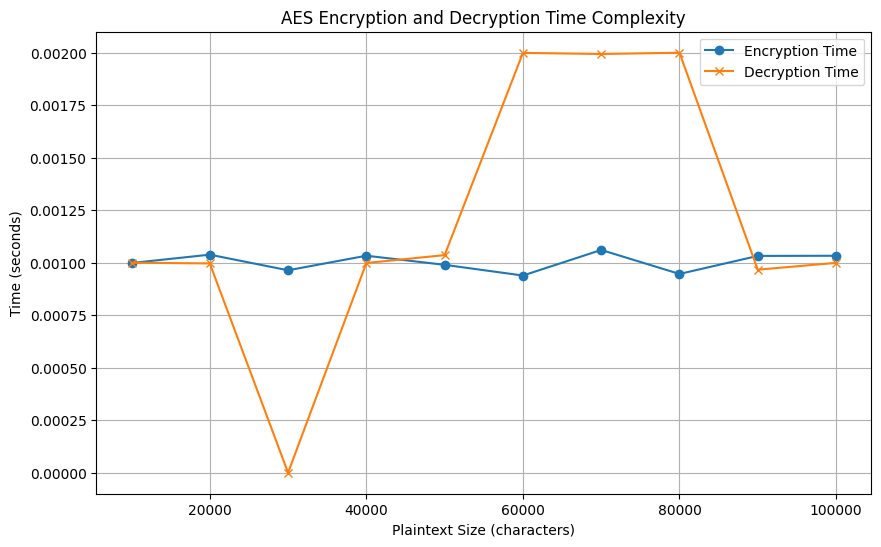

In [61]:
# Redo the time complexity measurement and plotting
import time
import matplotlib.pyplot as plt

# AES encryption and decryption functions from the user's code
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import base64

def aes_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(plaintext.encode('utf-8'))
    return base64.b64encode(nonce + ciphertext).decode('utf-8')

def aes_decrypt(ciphertext, key):
    raw = base64.b64decode(ciphertext)
    nonce = raw[:16]
    ciphertext = raw[16:]
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext.decode('utf-8')

# Test function to measure time complexity
def measure_aes_performance(plaintext, key):
    start_time = time.time()
    ciphertext = aes_encrypt(plaintext, key)
    encryption_time = time.time() - start_time
    
    start_time = time.time()
    decrypted_text = aes_decrypt(ciphertext, key)
    decryption_time = time.time() - start_time
    
    return encryption_time, decryption_time

# Generate test data
key = get_random_bytes(16)
plaintexts = ["A"] * 100  # Consistent plaintext for testing

# Measure performance for different plaintext sizes
encryption_times = []
decryption_times = []
sizes = []

for i in range(1, 11):
    plaintext = "A" * (i * 10000)  # Increase the size of the plaintext
    enc_time, dec_time = measure_aes_performance(plaintext, key)
    encryption_times.append(enc_time)
    decryption_times.append(dec_time)
    sizes.append(len(plaintext))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, encryption_times, label='Encryption Time', marker='o')
plt.plot(sizes, decryption_times, label='Decryption Time', marker='x')
plt.xlabel('Plaintext Size (characters)')
plt.ylabel('Time (seconds)')
plt.title('AES Encryption and Decryption Time Complexity')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
import time
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import base64

# AES encryption and decryption functions
def aes_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_EAX)
    nonce = cipher.nonce
    ciphertext, tag = cipher.encrypt_and_digest(plaintext.encode('utf-8'))
    return base64.b64encode(nonce + ciphertext).decode('utf-8')

def aes_decrypt(ciphertext, key):
    raw = base64.b64decode(ciphertext)
    nonce = raw[:16]
    ciphertext = raw[16:]
    cipher = AES.new(key, AES.MODE_EAX, nonce=nonce)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext.decode('utf-8')

# Generate a large plaintext string
large_plaintext = "A" * 1000000  # 1 million characters

# Measure encryption time
key = get_random_bytes(16)
start_time = time.time()
ciphertext = aes_encrypt(large_plaintext, key)
encryption_time = time.time() - start_time

# Measure decryption time
start_time = time.time()
decrypted_text = aes_decrypt(ciphertext, key)
decryption_time = time.time() - start_time

print(f"Encryption time: {encryption_time} seconds")
print(f"Decryption time: {decryption_time} seconds")


Encryption time: 0.013009309768676758 seconds
Decryption time: 0.012012958526611328 seconds
